# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 634


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() 
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

    # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | undurkhaan
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | bel ombre
Processing Record 4 of Set 1 | verkhnevilyuysk
Processing Record 5 of Set 1 | badger
Processing Record 6 of Set 1 | warrnambool
Processing Record 7 of Set 1 | hadibu
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | cabo san lucas
Processing Record 10 of Set 1 | phek
Processing Record 11 of Set 1 | alofi
Processing Record 12 of Set 1 | isafjordur
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | stanley
Processing Record 15 of Set 1 | port lincoln
Processing Record 16 of Set 1 | agadez
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | lihue
Processing Record 19 of Set 1 | college
Processing Record 20 of Set 1 | petropavlovsk-kamchatsky
Processing Record 21 of Set 1 | yagry
City not found. Skipping...
Processing Record 22 of Set 1 |

In [8]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          610
Lat           610
Lng           610
Max Temp      610
Humidity      610
Cloudiness    610
Wind Speed    610
Country       610
Date          610
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,undurkhaan,47.3194,110.6556,18.77,57,6,1.83,MN,1718066980
1,hermanus,-34.4187,19.2345,17.11,54,100,4.54,ZA,1718066981
2,bel ombre,-4.6167,55.4167,27.91,83,40,4.63,SC,1718066981
3,verkhnevilyuysk,63.4453,120.3167,22.13,43,55,1.79,RU,1718066981
4,badger,64.8000,-147.5333,21.95,46,100,4.12,US,1718066982


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,undurkhaan,47.3194,110.6556,18.77,57,6,1.83,MN,1718066980
1,hermanus,-34.4187,19.2345,17.11,54,100,4.54,ZA,1718066981
2,bel ombre,-4.6167,55.4167,27.91,83,40,4.63,SC,1718066981
3,verkhnevilyuysk,63.4453,120.3167,22.13,43,55,1.79,RU,1718066981
4,badger,64.8000,-147.5333,21.95,46,100,4.12,US,1718066982


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

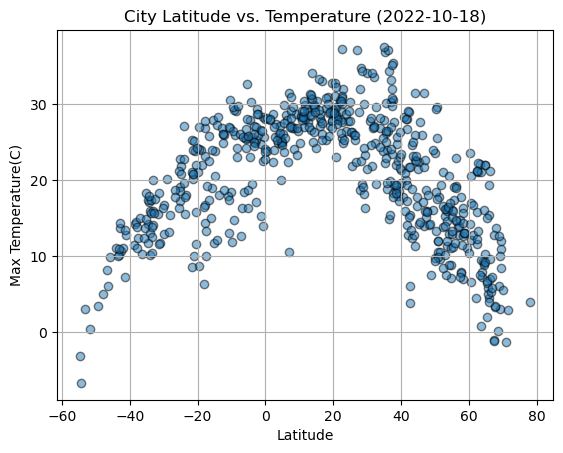

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df["Max Temp"],marker = 'o', 
            alpha=.5,edgecolors='black')
# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (2022-10-18)")
plt.ylabel("Max Temperature(C)")
plt.xlabel("Latitude")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

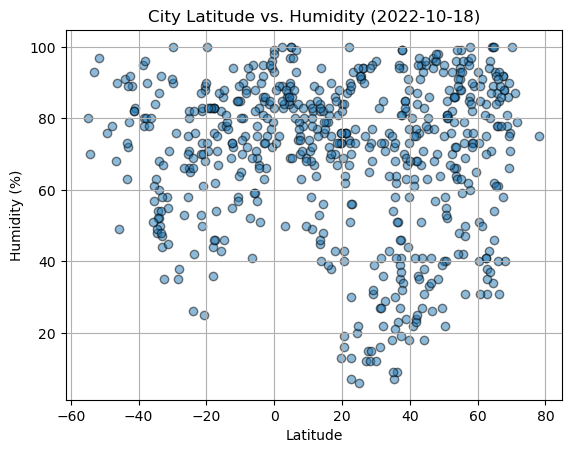

In [20]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df["Humidity"],marker = 'o', alpha=.5,edgecolors='black')
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

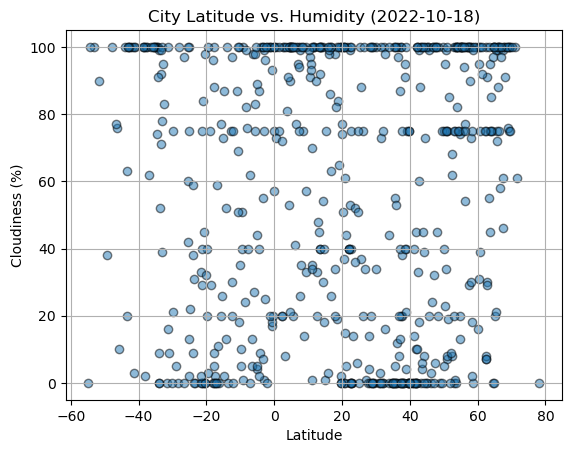

In [23]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df["Cloudiness"],
            marker = 'o', alpha=.5,edgecolors='black')
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

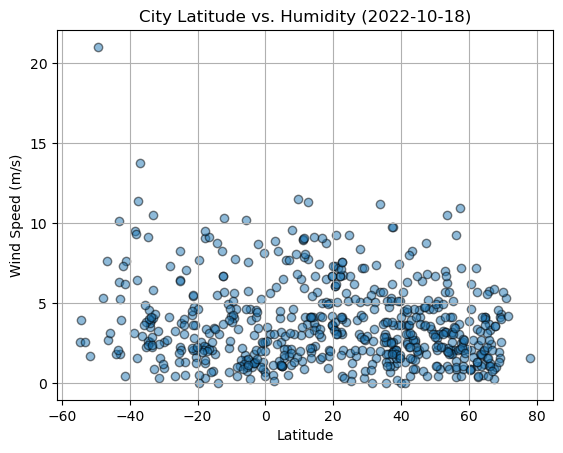

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df["Wind Speed"],marker = 'o', alpha=.5,edgecolors='black')
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
def linear_regression(x,y,x_c=.1,y_c=.9):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,xy=(x_c,y_c), xycoords='axes fraction', fontsize=15, color="red")
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,undurkhaan,47.3194,110.6556,18.77,57,6,1.83,MN,1718066980
3,verkhnevilyuysk,63.4453,120.3167,22.13,43,55,1.79,RU,1718066981
4,badger,64.8000,-147.5333,21.95,46,100,4.12,US,1718066982
6,hadibu,12.6500,54.0333,27.67,77,33,7.76,YE,1718066982
8,cabo san lucas,22.8909,-109.9124,32.01,56,0,6.75,MX,1718066983


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hermanus,-34.4187,19.2345,17.11,54,100,4.54,ZA,1718066981
2,bel ombre,-4.6167,55.4167,27.91,83,40,4.63,SC,1718066981
5,warrnambool,-38.3833,142.4833,14.19,80,100,9.53,AU,1718066982
7,port-aux-francais,-49.3500,70.2167,3.48,76,38,21.02,TF,1718066983
10,alofi,-19.0595,-169.9187,23.94,83,75,2.57,NU,1718066984


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.5632851241090998


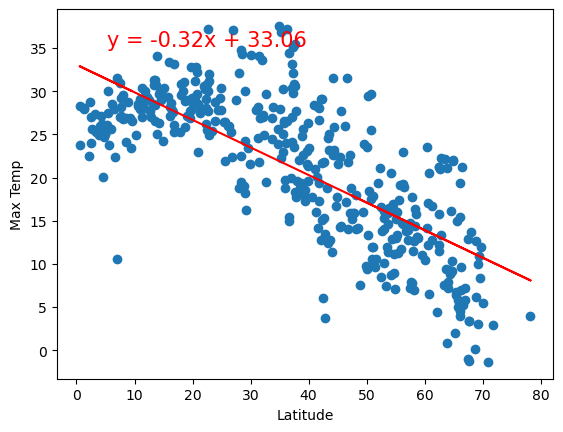

In [36]:
# Linear regression on Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
northern_hemi_equation = linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

The r-value is: 0.5580686758389383


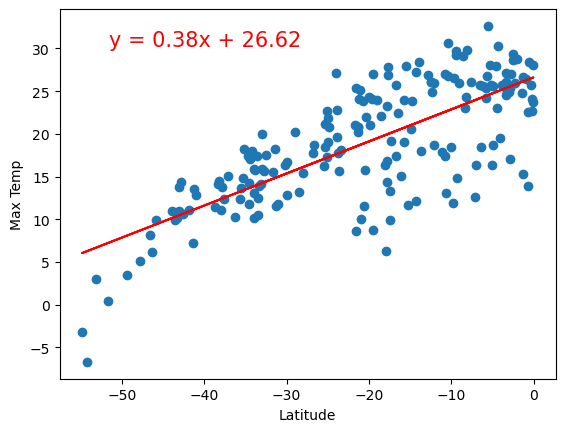

In [38]:
# Linear regression on Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
southern_hemi_equation = linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

**Discussion about the linear relationship:** There is a confident, strong correlation between latitude and temperature in both northern and southern hemispheres, as the closer you move to the equator the warmer temperature is.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 8.105624684845575e-06


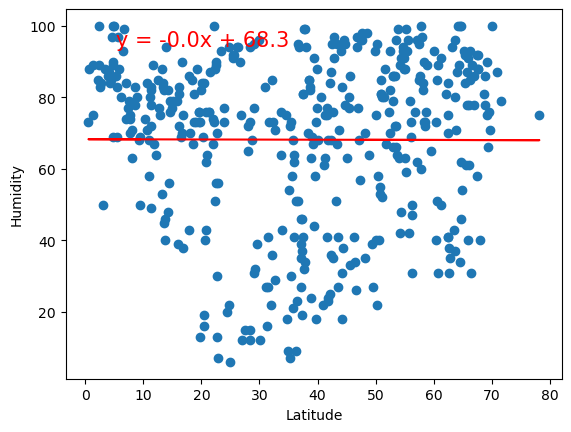

In [42]:
# Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Humidity")
northern_hemi_equation = linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

The r-value is: 0.016977970066059615


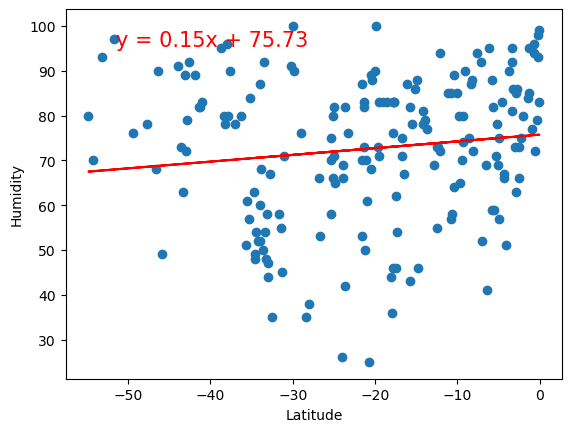

In [44]:
# Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Humidity")
southern_hemi_equation = linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** There is a weak correlation between latitude and humidity in both northern and southern zones of the earth. Humidity is not especially affected by the variable of latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0010990142833970948


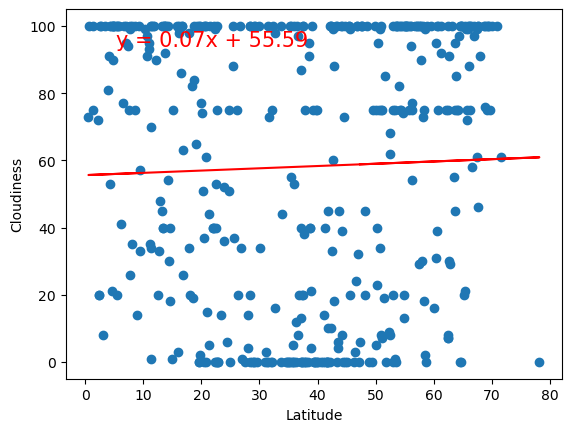

In [48]:
# Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
northern_hemi_equation = linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

The r-value is: 0.022044646957209684


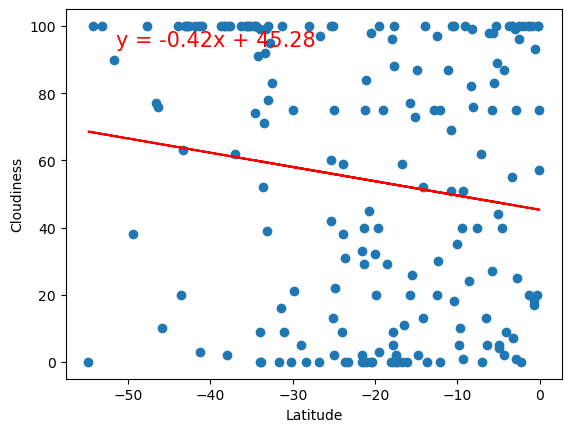

In [50]:
# Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
southern_hemi_equation = linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** There is a moderate correlation between latitude and cloudiness, as the farther from the equator places are the more cloudy their climate appears to be.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.04504717171614371


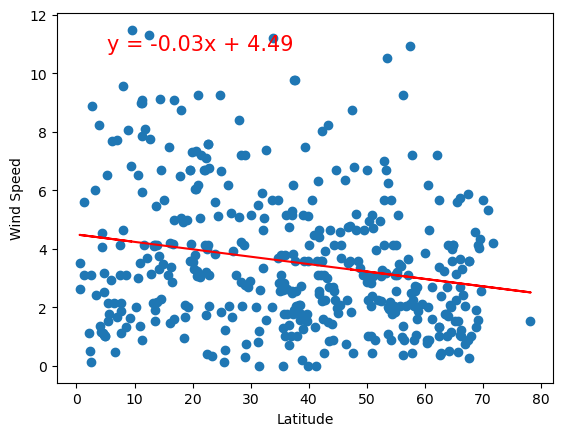

In [54]:
# Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
northern_hemi_equation = linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

The r-value is: 0.053841087807546886


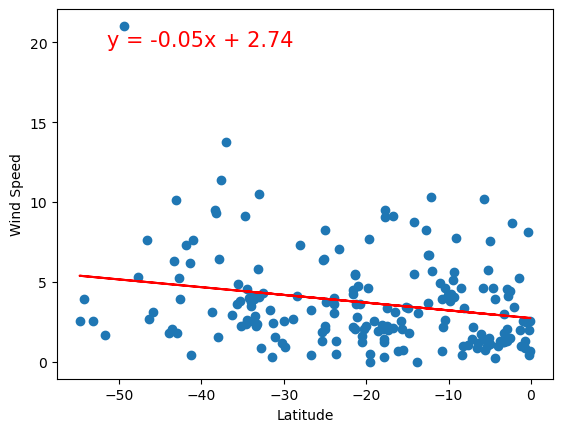

In [56]:
# Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
southern_hemi_equation = linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** There is no statistically significant correlation between latitude and wind speed across regions in both hemispheres.